In [1]:
import random

import matplotlib.pyplot as plt
import skimage.io

from detection import *
from mrcnn import visualize
from mrcnn.model import log

/Library/Python/3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Python/3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Python/3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Library/Python/3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym

In [2]:
dataset_train = RoadSignsDataset()
dataset_train.load_signs(DATASET_PATH, "train")
dataset_train.prepare()

dataset_val = RoadSignsDataset()
dataset_val.load_signs(DATASET_PATH, "val")
dataset_val.prepare()

Have classes 8: {1, 2, 3, 4, 6, 8, 10, 13}
[{'source': '', 'id': 0, 'name': 'BG'}, {'source': 'coco', 'id': 1, 'name': 'person'}, {'source': 'coco', 'id': 2, 'name': 'bicycle'}, {'source': 'coco', 'id': 3, 'name': 'car'}, {'source': 'coco', 'id': 4, 'name': 'motorcycle'}, {'source': 'coco', 'id': 6, 'name': 'bus'}, {'source': 'coco', 'id': 8, 'name': 'truck'}, {'source': 'coco', 'id': 10, 'name': 'traffic light'}, {'source': 'coco', 'id': 13, 'name': 'stop sign'}, {'source': 'coco', 'id': 91, 'name': 'road_sign'}]
Have classes 6: {1, 3, 6, 8, 10, 13}
[{'source': '', 'id': 0, 'name': 'BG'}, {'source': 'coco', 'id': 1, 'name': 'person'}, {'source': 'coco', 'id': 2, 'name': 'bicycle'}, {'source': 'coco', 'id': 3, 'name': 'car'}, {'source': 'coco', 'id': 4, 'name': 'motorcycle'}, {'source': 'coco', 'id': 6, 'name': 'bus'}, {'source': 'coco', 'id': 8, 'name': 'truck'}, {'source': 'coco', 'id': 10, 'name': 'traffic light'}, {'source': 'coco', 'id': 13, 'name': 'stop sign'}, {'source': 'coco'

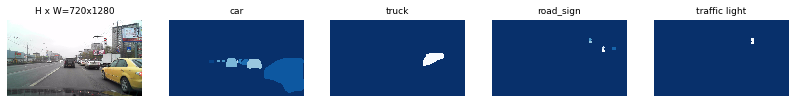

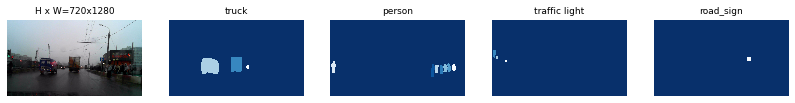

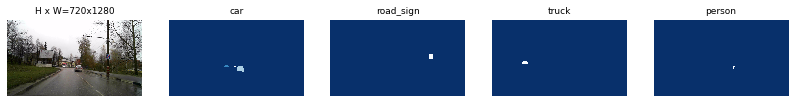

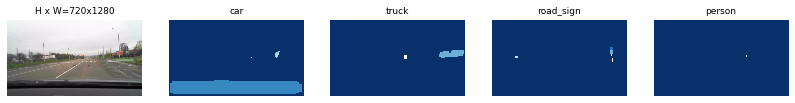

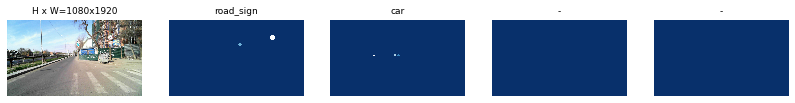

In [3]:
image_ids = np.random.choice(dataset_train.image_ids, 5)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126]
original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (22,)                 min:    0.00000  max: 1280.00000  float64
gt_class_id              shape: (19,)                 min:    3.00000  max:    9.00000  int32
gt_bbox                  shape: (19, 4)               min:    1.00000  max:  834.00000  int32
gt_mask                  shape: (1024, 1024, 19)      min:    0.00000  max:    1.00000  bool


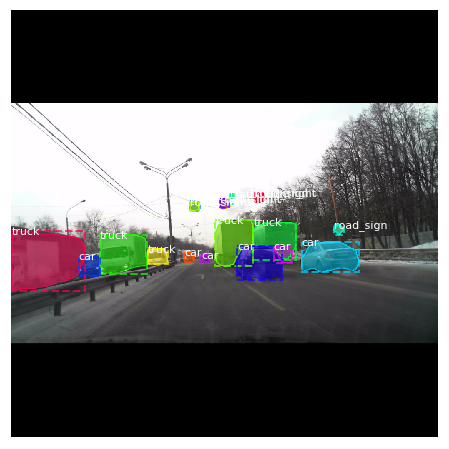

In [4]:
inference_config = InferenceConfig()

image_id = random.choice(dataset_val.image_ids)
print(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Processing 1 images
image                    shape: (1280, 960, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 22)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (1280, 960, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 22)               min:    0.00000  max: 1280.00000  float64
anchors                  s

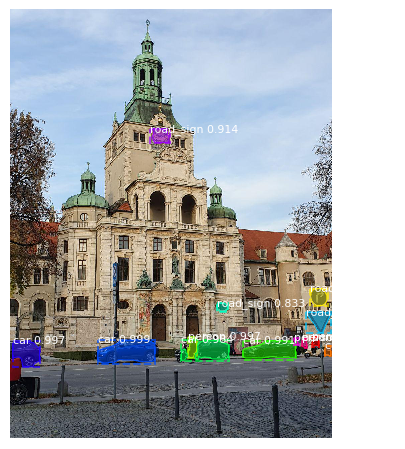

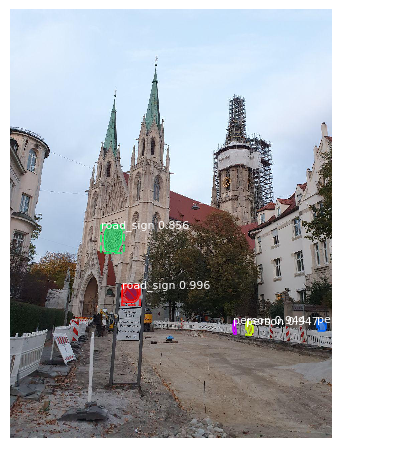

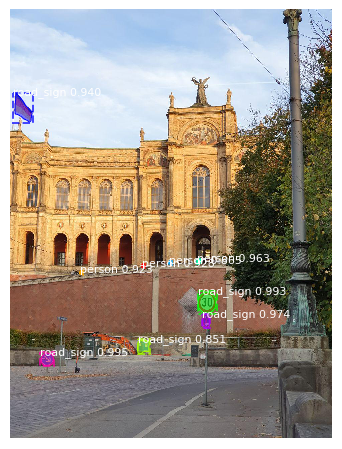

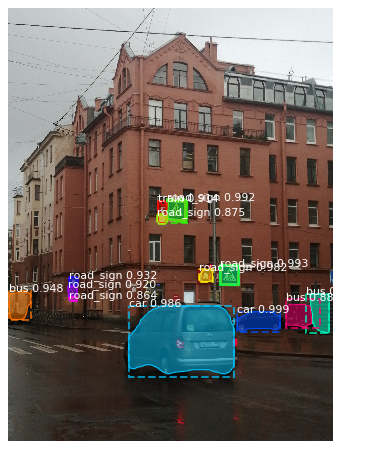

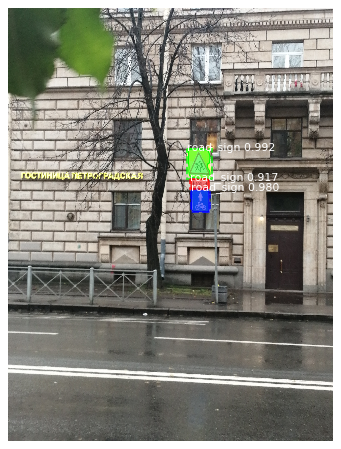

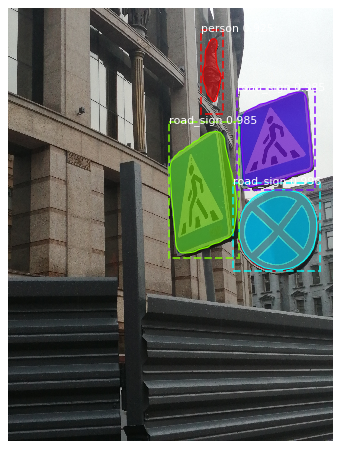

In [6]:
def get_ax(rows=1, cols=1, size=8):
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

COCO_CLASSES[9] = "road_sign"

def print_detection(subset, image_name):
    image_path = os.path.join("/Users/am.volkov/Documents/sign_dataset",subset)
    image_path = os.path.join(image_path,image_name)

    original_image = skimage.io.imread(image_path)
    results = detect(original_image)

    r = results[0]
    visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            COCO_CLASSES, r['scores'], ax=get_ax())
  
print_detection("train", "201.jpg")
print_detection("train", "202.jpg")
print_detection("train", "203.jpg")
print_detection("val", "211.jpg")
print_detection("val", "216.jpg")
print_detection("val", "207.jpg")